In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loadind the dataset
df = pd.read_csv('dataset.csv')

In [2]:
# Print top 10 values
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


### Data Cleaning

In [3]:
# Checking For null values
def getDfSummary(input_data):
    # Place your code here
    describe,output_data = input_data.describe().T,pd.DataFrame() 
    rows,columns = [input_data.isnull().sum(axis = 0), input_data.nunique(dropna=True), describe['mean'], describe['max'], describe['min'], 
              describe['std'], describe['25%'], describe['50%'], describe['75%']],['number_nan','number_distinct','mean','max','min','std','25%','50%','75%']
    for i in range(0,len(columns)):
        output_data[columns[i]] = rows[i]
    return output_data

getDfSummary(df)

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
Id,0,4446966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groupId,0,2026745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matchId,0,47965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,0,20,0.233815,22.0,0.0,0.588573,0.0,0.0000,0.000000
boosts,0,27,1.106908,33.0,0.0,1.715794,0.0,0.0000,2.000000
damageDealt,0,29916,130.717138,6616.0,0.0,170.780621,0.0,84.2400,186.000000
DBNOs,0,39,0.657876,53.0,0.0,1.145743,0.0,0.0000,1.000000
headshotKills,0,34,0.226820,64.0,0.0,0.602155,0.0,0.0000,0.000000
heals,0,63,1.370147,80.0,0.0,2.679982,0.0,0.0000,2.000000
killPlace,0,101,47.599350,101.0,1.0,27.462937,24.0,47.0000,71.000000


In [4]:
# Deleting the rows with null value.
# Since there is only one row with null value, we are deleting that row as replacing it with zero doesn't make any sense here.
df=df.dropna()
# df.shape


In [5]:
# Calculatin total distance travelled by the person and adding new column
df['totalDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,49.7500
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0.0000,0,0.00,0,0,34.70,1,0,0.0370,34.7000
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0.0000,0,0.00,0,0,13.50,1,1497,0.0000,13.5000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368,3093.0000
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0.0000,0,0.00,0,0,799.90,4,0,0.3704,799.9000
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0.0000,0,0.00,0,0,65.67,1,0,0.2143,65.6700


In [6]:
# removing outliers
#1. kills if distance 0 is invalid
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['cheatkills'] = ((df['kills'] > 0) & (df['totalDistance'] == 0))
display(df[df['cheatkills'] == True].shape)
df[df['cheatkills'] == True].head(10)
df.drop(df[df['cheatkills'] == True].index, inplace=True) 

# 2. No roadkills if vehicle distance is 0
# df['vehicleDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['cheatRoadkills'] = ((df['roadKills'] > 0) & (df['rideDistance'] == 0))
display(df[df['cheatRoadkills'] == True].shape)
df[df['cheatRoadkills'] == True].head(10)
df.drop(df[df['cheatRoadkills'] == True].index, inplace=True) 

# 3. Weapons acquired 0 and 

(1535, 31)

(186, 32)

### Data Preparation

In [7]:
# Data preparation - 
# df.loc[df['matchType'].isin(["solo","solo-fpp"])]
# mapping the match types to integer values
nodes = list(set(df['matchType']))
nodes_dict = dict(zip(nodes, range(len(nodes))))
df = df.applymap(lambda x: nodes_dict.get(x) if x in nodes_dict else x)
nodes = list(set(df['matchType']))
getDfSummary(df)


,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
Id,0,4445244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groupId,0,2026472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matchId,0,47964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,0,20,0.233303,22.0,0.0,0.586886,0.0,0.0000,0.000000
boosts,0,27,1.107194,33.0,0.0,1.715929,0.0,0.0000,2.000000
damageDealt,0,29888,130.557698,6616.0,0.0,170.287290,0.0,84.1700,186.000000
DBNOs,0,39,0.657596,53.0,0.0,1.144135,0.0,0.0000,1.000000
headshotKills,0,34,0.226438,64.0,0.0,0.600763,0.0,0.0000,0.000000
heals,0,63,1.369959,80.0,0.0,2.679710,0.0,0.0000,2.000000
killPlace,0,101,47.607553,101.0,1.0,27.463361,24.0,47.0000,71.000000


In [ ]:
# col_list = list(df)
# col_list[14],col_list[28] = col_list[28], col_list[14]
# df.columns = col_list
# list(df)


In [ ]:
# train_df = df.sample(frac = 0.8,replace = False, random_state = 1)
# test_df = df.loc[:,df.columns != 'matchDuration']
# list(test_df)

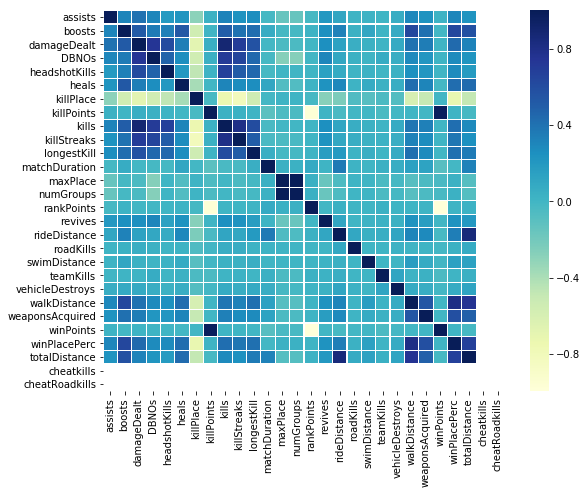

In [8]:
drop_cols = ['Id', 'groupId', 'matchId', 'matchType']
corr_cols = [col for col in df.columns if col not in drop_cols]
corr = df[corr_cols].corr()

plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="YlGnBu"
)
plt.show()
# print(corr)


In [9]:
# finding top 5 correlation with winning
top_five = corr.nlargest(6,'winPlacePerc')
top_five = top_five['winPlacePerc']
top_five= top_five.to_frame().transpose()
top_five

,winPlacePerc,walkDistance,totalDistance,boosts,weaponsAcquired,damageDealt
winPlacePerc,1.0,0.811204,0.677266,0.634412,0.587539,0.441477


In [10]:
from sklearn.tree import DecisionTreeClassifier as dtf

In [ ]:
# Testing and training
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

train_df=df.sample(frac=0.8,random_state=200)
test_df = df.loc[~df.index.isin(train_df.index)]

# Converting float to integer to treat continuous error
lab_enc = preprocessing.LabelEncoder()
encoded_totalDistance = lab_enc.fit_transform(train_df.totalDistance)

decision_tree_classifier = DecisionTreeClassifier(criterion='entropy')
train_data,train_target = train_df.iloc[:,3:29],encoded_totalDistance
decision_tree_classifier.fit(train_data, train_target)

In [11]:
train_features = df.loc[:,'assists':'winPlacePerc']
y = df.loc[:,'totalDistance']
dt_clf = dtf(criterion = 'entropy')
dt_clf.fit(train_features, y)

ValueError: Unknown label type: 'continuous'

In [ ]:
from matplotlib import pyplot as plt

featurelength=np.arange(len(list(train_features)))
imp=pd.DataFrame({"Features":list(train_features),"Importance":dt_clf.feature_importances_})
# imp = sorted((dt_clf.feature_importances_), reverse = True)
print(type(imp))
# print(imp)
# print('-'*10)
# print(imp.sort_values(by='Importance',ascending=False))
plt.bar(featurelength,imp["Importance"], color = "indigo")
plt.rcParams['figure.figsize']=(20,10)
plt.xticks(featurelength,imp["Features"])
plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()